In [72]:
import pandas as pd
import matplotlib.pyplot as plt

## Cleaning Data

In [73]:
df = pd.read_csv("weekly_data.csv")
df.Date = pd.to_datetime(df.Date)

In [75]:
df[df.Site == 'AOCI']

,Date,Site,Staff Reported Positive Tests,# of Currently Positive Staff,Staff Deaths,Staff Recovered,Housing type,Isolation Inmates,Positive Inmates,Confirmed Inmate Deaths,...,N2,B.1.1.7 (Alpha),B.1.351 (Beta),P.1 (Gamma),B.1.617 (Delta),B.1.427/B.1.429 (Epsilon),N679K/Q954H (Omicron),Presumptive Cases,Average Presumptive Cases,Flow Rate
0,2020-09-04,AOCI,32.0,16.0,0.0,16.0,NaN,83.0,79.0,0.0,...,272.00,NaN,NaN,NaN,NaN,NaN,NaN,95.0,95.0,258631.00
36,2020-09-09,AOCI,32.0,8.0,0.0,24.0,NaN,58.0,57.0,0.0,...,60.00,NaN,NaN,NaN,NaN,NaN,NaN,65.0,78.0,258631.00
72,2020-09-15,AOCI,33.0,5.0,0.0,28.0,NaN,29.0,29.0,0.0,...,62.80,NaN,NaN,NaN,NaN,NaN,NaN,34.0,48.0,258631.00
108,2020-09-22,AOCI,33.0,2.0,0.0,31.0,NaN,13.0,13.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,23.0,258631.00
144,2020-09-29,AOCI,34.0,3.0,0.0,31.0,NaN,0.0,0.0,0.0,...,9.29,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,258631.00
180,2020-10-06,AOCI,34.0,2.0,0.0,32.0,NaN,0.0,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,258631.00
222,2020-10-13,AOCI,34.0,2.0,0.0,32.0,NaN,0.0,0.0,0.0,...,3.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,258631.00
264,2020-10-20,AOCI,35.0,2.0,0.0,33.0,NaN,0.0,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,258631.00
306,2020-10-27,AOCI,46.0,13.0,0.0,33.0,NaN,1.0,1.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,6.0,258631.00
349,2020-11-03,AOCI,57.0,23.0,0.0,34.0,NaN,4.0,3.0,5.0,...,26.20,NaN,NaN,NaN,NaN,NaN,NaN,26.0,21.0,258631.00


In [11]:
pd.set_option('display.max_rows', None)
#df.drop(df[df.Site == 'AOCI-OAKWOOD'].index, inplace=True)
df.drop(df[df.Site.isin(['AOCI-ALLEN', 'AOCI-OAKWOOD', "FMC A", "FMC B","GCC", 'ORIENT',
                        "RCI Adjusted", "PCI Adjusted"])].index, inplace=True)
df.drop(df[df.Site.isin(["LeCC", "MANCC", 'MCC', 'OSPC', 'TCC', 'ToCI', 'VA HOSP', 'TCRC'])].index, inplace=True)

Adding coordinates (X,Y) to the data

In [62]:
coord = pd.read_csv('geospatial data/prison_sites.csv')
coord.rename(columns={'Name':'Site'}, inplace=True)

In [65]:
pd.merge(df, coord, on='Site', how='outer') #.to_csv('data_cleaned.csv')

One hot encoding of categorical variables: Site, Housing type, Strains (Alpha, Beta, Gamma, Delta, Epsilon, Omicron

In [67]:
df.dtypes

Date                             datetime64[ns]
Site                                     object
Staff Reported Positive Tests           float64
# of Currently Positive Staff           float64
 Staff Deaths                           float64
Staff Recovered                         float64
Housing type                             object
Isolation Inmates                       float64
Positive Inmates                        float64
Confirmed Inmate Deaths                 float64
Pending Results                         float64
Recovered Inmates                       float64
Daily Recovered                         float64
N1                                      float64
N2                                      float64
B.1.1.7 (Alpha)                          object
B.1.351 (Beta)                           object
P.1 (Gamma)                              object
B.1.617 (Delta)                          object
B.1.427/B.1.429 (Epsilon)                object
N679K/Q954H (Omicron)                   

In [68]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_results = enc.fit_transform(df[["Site"]])
pd.DataFrame(enc_results.toarray(), columns=enc.categories_).head()

,AOCI,BECI,CCI,CRC,DCI,FMC,GCI,LAECI,LECI,LOCI,...,ORW,OSP,PCI,RCI,RICI,SCI,SOCF,TCI,TOCI,WCI
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

transformer = make_column_transformer(
    (OneHotEncoder(), ['Site']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [71]:
transformed_df.to_csv('data_encoded.csv')

## Missing variables

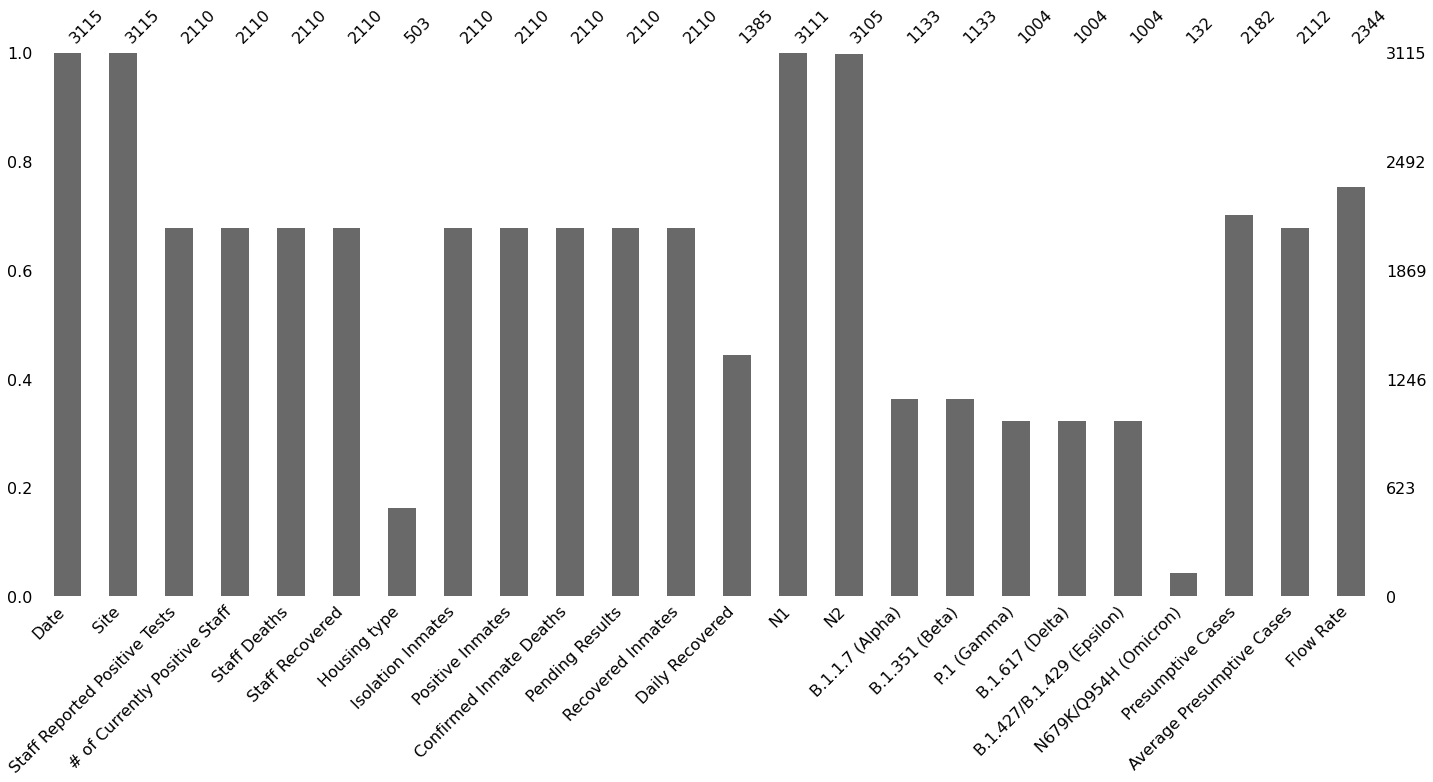

In [17]:
import missingno as msno

msno.bar(df)
plt.savefig('missing_barplot.png', bbox_inches='tight')

In [43]:
# & (df['B.1.617 (Delta)'] == 'negative')]
#df[(df['Date'].dt.year == 2020)].iloc[:, -9:-3].nunique()
df[(df['Date'].dt.year == 2021)]['Housing type']#.nunique()

735        NaN
736        NaN
737        NaN
738        NaN
739        NaN
         ...  
2978     COMBO
2979       NaN
2980    CELLED
2981       NaN
2982    CELLED
Name: Housing type, Length: 2248, dtype: object

In [ ]:
missingno 

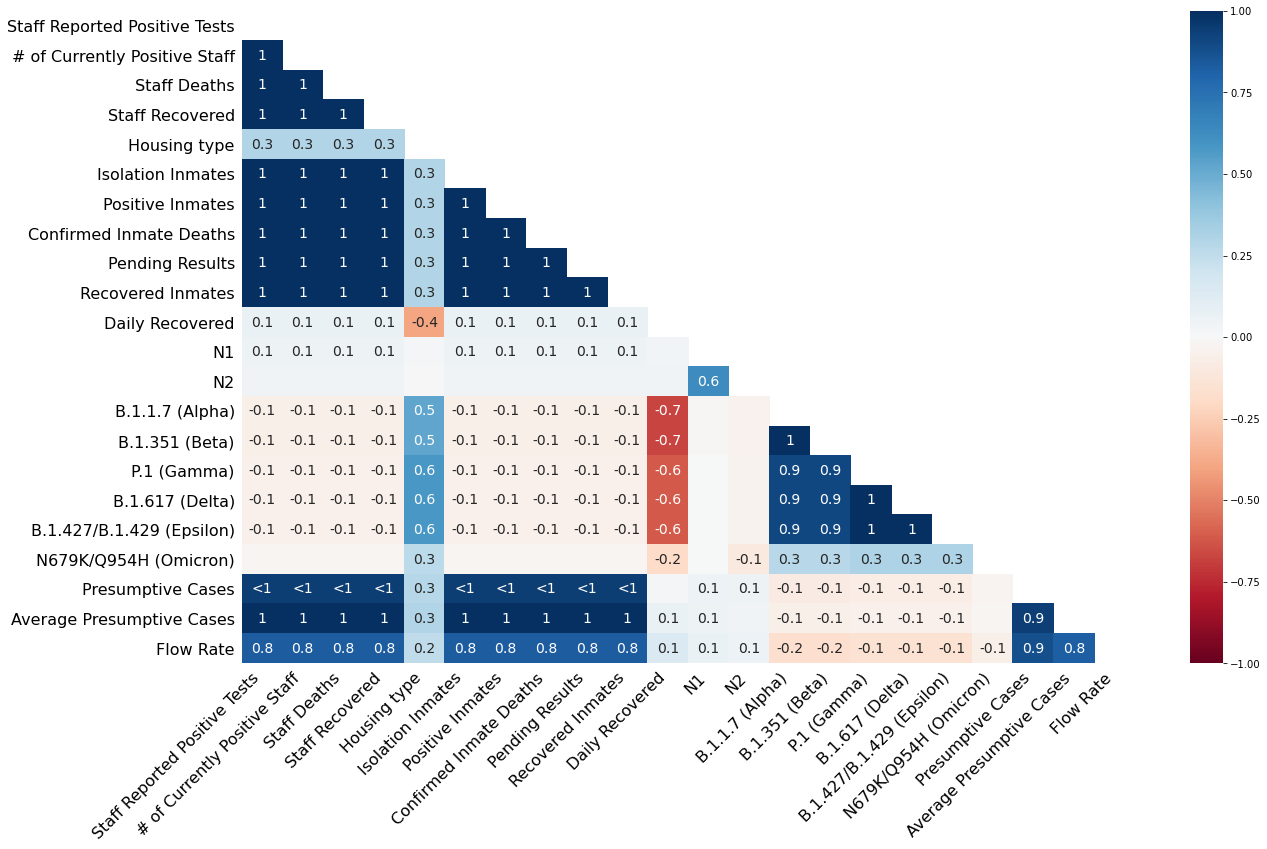

In [44]:
msno.heatmap(df)
plt.savefig('missing_heatmap.png')
plt.savefig('missing_barplot.png', bbox_inches='tight')